# Labolatorium 7
## Dekompozycja spektralna

Oh boy, back to algebra

### Wstęp teoretyczny

Co jak co przydałby się.

Dekompozycja spektralna jest to specjalny przypadek `Dekompozycji na wektory własne` [(ang. Eigendecomposition of a matrix) tak jak nazwa angielska wskazuje jest to podział macierzy (kwadratowej) do postaci kanonicznej, czyli reprezentowanej przez jej `wektory i wartości własne`, więcej [tu](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)], w której macierz faktoryzowana jest [normalna](https://en.wikipedia.org/wiki/Normal_matrix), lub [symetryczna](https://en.wikipedia.org/wiki/Symmetric_matrix). Terminologia ta wywodzi się z Twierdzenia spektralnego (dlaczego to jest twierdzeniem po polsku kiedy po angielsku to tylko teoria wiedzą tylko najwięksi matematycy)

### 1. Metoda potęgowa

[nawet znalazłem coś na wikipedii, nie tylko na wykładzie z macierzowych xd](https://en.wikipedia.org/wiki/Power_iteration)

Metoda potęgowa ma na celu wyznaczenie dominującej wartości (i wektora) własnej (czyli najbardziej oddalonej od zera, podobny koncept co przy `Singular Value Decomposition`).

Do wyliczenia będziemy stosować wzór rekurencyjny

$$
x_{i+1} = \frac{Ax_i}{||x_i||}
$$

Zapis ten oznacza mnożenie wektora $x_i$ przez macierz A a następnie normalizowanie go po każdym kroku

Proces ten wykonujemy aż do przekroczenia maksymalnej liczby iteracji lub w przypadku przekroczenia kryterium małej poprawki.

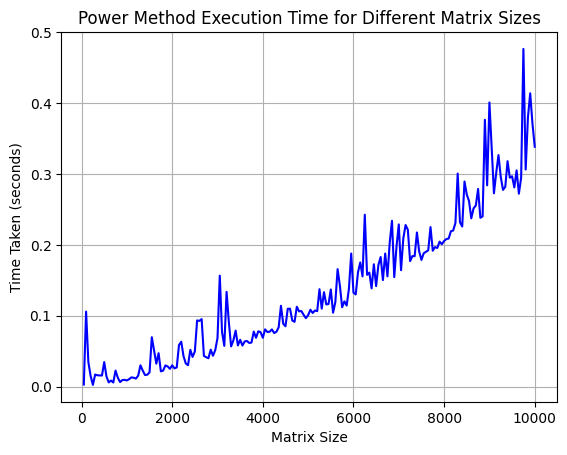

In [17]:
import math
import numpy as np
from copy import deepcopy
import scipy
import scipy.linalg
import time
import matplotlib.pyplot as plt

def normalise_vector(x):
    length = calculate_vector_length(x)

    for i in range(len(x)):
        x[i] /= length

def calculate_vector_length(x):
    length = 0
    for xi in x:
        length += xi**2

    return math.sqrt(length)

def determine_vector_length(x1,x2):
    sumVec = []
    for i in range(len(x1)):
        sumVec.append(x1[i]-x2[i])
    
    return calculate_vector_length(sumVec) 

def power_method(matrix, max_iter=10000000, eps=1e-15):
    
    x = np.random.rand(matrix.shape[1])

    for _ in range(max_iter):
        prev_x = deepcopy(x)
        x = matrix.dot(x)
        normalise_vector(x)
        #kryterium małej poprawki
        if abs(determine_vector_length(prev_x,x)) < eps:
            return x , max(x, key=lambda x: abs(x))
        
    return x , max(x, key=lambda x: abs(x)) 


def plot_power_method_time():
    sizes = np.linspace(50,10000,200,dtype=np.int64)
    times = []
    
    for size in sizes:
        matrix = np.random.rand(size, size)
        start_time = time.time()
        power_method(matrix)
        end_time = time.time()
        times.append(end_time - start_time)
        #print(f"Size {size}x{size}: {end_time - start_time:.5f} seconds")
    
    plt.plot(sizes, times, color='b')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Power Method Execution Time for Different Matrix Sizes')
    plt.grid()
    plt.show()

plot_power_method_time()


Widać tendencje (na moje oko) wielomianową na tym wykresie

### 2. Odwrotna metoda potęgowa

Jak zwykle wikipedia przychodzi na ratunek [o tutaj](https://en.wikipedia.org/wiki/Inverse_iteration)

In [41]:
import scipy.linalg as la
def inverse_power_method(A, sigma, eps=1e-12, max_iter=100000):
    n = A.shape[0]
    I = np.eye(n)
    B = A - sigma * I
    
    P, L, U = la.lu(B)
    
    x = np.random.rand(n)
    x /= np.linalg.norm(x)
    
    for _ in range(max_iter):
        y = la.solve(U, la.solve(L, P @ x))
        
        x_new = y / np.linalg.norm(y)
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    
    lambda_approx = x.T @ A @ x / (x.T @ x)
    return lambda_approx, x

A = np.array([[4, 1], [2, 3]])
sigma = 3.5 
lambda_approx, eigenvector = inverse_power_method(A, sigma)
print(f"Approx eigenvalie: {lambda_approx}")
print(f"Corresponding eigenvector: {eigenvector}")

Approx eigenvalie: 5.074260762907015
Corresponding eigenvector: [0.78309017 0.62190818]


Po kilkukrotnym uruchomieniu można zauważyć, że wartości wyliczane są znacząco różne. Ale na podstawie mojego zrozumienia tak powinno być, bo jest to aproksymacja

### 3. Iteracje z ilorazem Rayleigha

[W I K I P E D I A](https://en.wikipedia.org/wiki/Rayleigh_quotient_iteration)

In [49]:
def rayleigh_quotient_iteration(A,nb_iterations):
    n = A.shape[0]
    v = np.random.randn(n)
    v = v/np.linalg.norm(v)
    l = v.T.dot(A.dot(v))
    for _ in range(nb_iterations):
        w = np.linalg.inv(A-l*np.eye(n)).dot(v)
        v  = w / np.linalg.norm(w)
        l = v.T.dot(A).dot(v)
    return(v,l)

A = np.random.random((10,10))
A = A.T.dot(A)
rayleigh_quotient_iteration(A,100)

(array([-0.1836352 ,  0.25290458, -0.54070629,  0.03809944,  0.06839031,
         0.46972445, -0.3257848 ,  0.38918122, -0.35375729,  0.0210299 ]),
 1.5379312113534205)

Działa :)

